# Рекомендательные системы

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_ratings = pd.read_csv("data/ratings.csv")
df_movies = pd.read_csv("data/movies.csv")

In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
df_ratings = df_ratings.merge(df_movies[['movieId', 'title']],how='left', on='movieId')

In [10]:
df_ratings.groupby('rating').count()

,userId,movieId,timestamp,title
rating,,,,
0.5,1370,1370,1370,1370
1.0,2811,2811,2811,2811
1.5,1791,1791,1791,1791
2.0,7551,7551,7551,7551
2.5,5550,5550,5550,5550
3.0,20047,20047,20047,20047
3.5,13136,13136,13136,13136
4.0,26818,26818,26818,26818
4.5,8551,8551,8551,8551


/var/folders/1h/6qfyp7nn31g62hlw2tr2yltm0000gn/T/ipykernel_1774/3843737470.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([num for num in ax.get_yticks()])


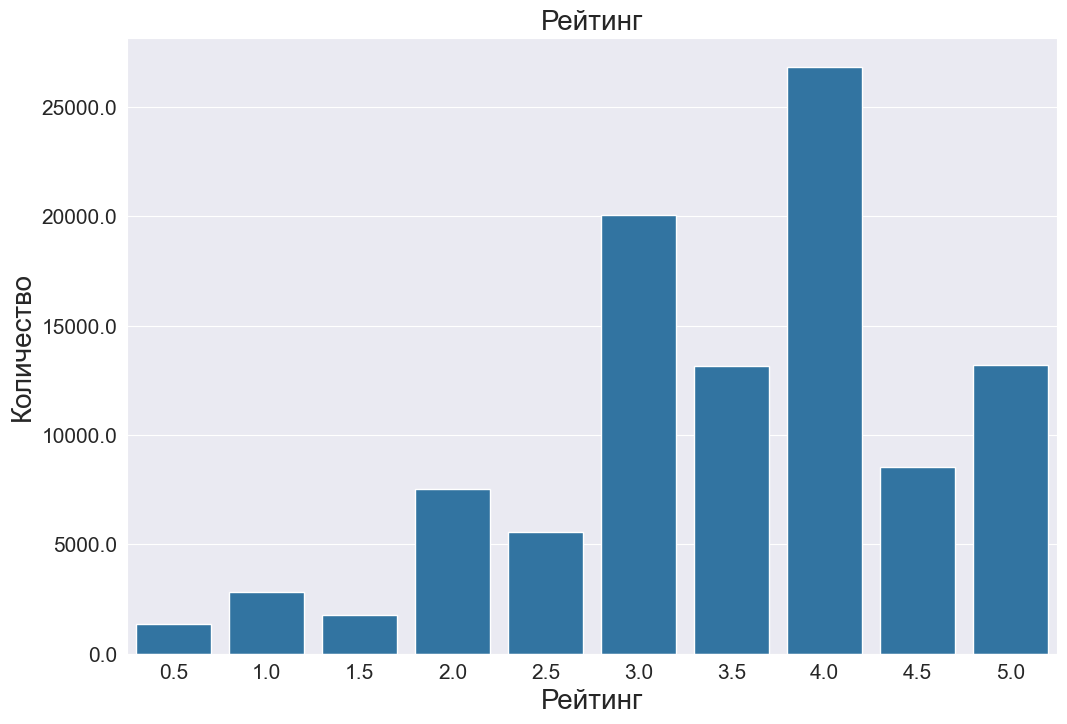

In [14]:
#df_ratings.hist(column='rating')
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=df_ratings)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Рейтинг", fontsize = 20)
plt.xlabel("Рейтинг", fontsize = 20)
plt.ylabel("Количество", fontsize = 20)
plt.show()

In [15]:
df_ratings.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

In [16]:
df_ratings.groupby(by = "title")["rating"].count().sort_values(ascending = False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

## Матрица

In [17]:
df_user_item = df_ratings.pivot_table(index=['userId'], columns=['title'], values='rating')

In [18]:
df_user_item.tail(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [19]:
df_user_item.shape

(610, 9719)

## Тестирование

In [20]:
forrestGumpRatings = df_user_item['Forrest Gump (1994)']

In [21]:
forrestGumpRatings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

Проверим схожие фильмы

In [22]:
similarMovies = df_user_item.corrwith(forrestGumpRatings).dropna()

/Users/anastasianikitina/PycharmProjects/ds_course/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/anastasianikitina/PycharmProjects/ds_course/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/anastasianikitina/PycharmProjects/ds_course/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/anastasianikitina/PycharmProjects/ds_course/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/anastasianikitina/PycharmProjects/ds_course/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [23]:
similarMovies

title
'burbs, The (1989)                0.197712
(500) Days of Summer (2009)       0.234095
*batteries not included (1987)    0.892710
...And Justice for All (1979)     0.928571
10 Cent Pistol (2015)            -1.000000
                                    ...   
[REC]² (2009)                    -0.052414
eXistenZ (1999)                   0.011189
xXx (2002)                        0.306817
xXx: State of the Union (2005)    0.383482
¡Three Amigos! (1986)             0.449692
Length: 5460, dtype: float64

In [24]:
similarMovies.sort_values(ascending=False)[:15]

title
Lost & Found (1999)                                   1.0
Century of the Self, The (2002)                       1.0
The 5th Wave (2016)                                   1.0
Play Time (a.k.a. Playtime) (1967)                    1.0
Memories (Memorîzu) (1995)                            1.0
Playing God (1997)                                    1.0
Killers (2010)                                        1.0
Girl Walks Home Alone at Night, A (2014)              1.0
Tampopo (1985)                                        1.0
Cercle Rouge, Le (Red Circle, The) (1970)             1.0
The Boss (2016)                                       1.0
Poison Ivy: New Seduction (1997)                      1.0
Tale of Two Sisters, A (Janghwa, Hongryeon) (2003)    1.0
Welcome to the Jungle (2013)                          1.0
Take Shelter (2011)                                   1.0
dtype: float64

## Формируем рекомендации

In [25]:
corr_matrix = df_user_item.corr(method='pearson', min_periods=100) # min_periods отвечает за количество наблюдений, чтобы сделать оценку по корреляции

In [26]:
corr_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
user_ratings = df_user_item.loc[7].dropna()
user_ratings

title
2001: A Space Odyssey (1968)           4.0
A.I. Artificial Intelligence (2001)    4.5
Aladdin (1992)                         3.0
American Beauty (1999)                 4.0
Apocalypse Now (1979)                  4.0
                                      ... 
What Women Want (2000)                 4.0
Wild Wild West (1999)                  1.5
X-Men (2000)                           3.5
X-Men: The Last Stand (2006)           4.0
X2: X-Men United (2003)                4.0
Name: 7, Length: 152, dtype: float64

In [43]:
import pandas as pd

simCandidates_list = []

for i in range(len(user_ratings.index)):
    sims = corr_matrix[user_ratings.index[i]].dropna()
    sims = sims.map(lambda x: x * user_ratings[i])
    simCandidates_list.append(sims)

# Объединяем все результаты в одну Series
simCandidates = pd.concat(simCandidates_list)

simCandidates.sort_values(inplace=True, ascending=False)

/var/folders/1h/6qfyp7nn31g62hlw2tr2yltm0000gn/T/ipykernel_1774/3862868391.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims = sims.map(lambda x: x * user_ratings[i])


In [44]:
user_ratings.index[7]

'As Good as It Gets (1997)'

In [45]:
corr_matrix[user_ratings.index[7]].dropna()

Series([], Name: As Good as It Gets (1997), dtype: float64)

In [46]:
user_ratings[7]

/var/folders/1h/6qfyp7nn31g62hlw2tr2yltm0000gn/T/ipykernel_1774/4195165550.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_ratings[7]


0.5

In [47]:
sims = corr_matrix[user_ratings.index[7]].dropna()

In [48]:
sims = sims.map(lambda x: x * user_ratings[7])

In [49]:
sims

Series([], Name: As Good as It Gets (1997), dtype: float64)

In [50]:
simCandidates

title
Silence of the Lambs, The (1991)             5.000000
Back to the Future (1985)                    5.000000
Terminator, The (1984)                       5.000000
Forrest Gump (1994)                          5.000000
Jurassic Park (1993)                         5.000000
                                               ...   
Pulp Fiction (1994)                         -0.376668
Pulp Fiction (1994)                         -0.431635
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   -0.474771
Pulp Fiction (1994)                         -0.719040
Fargo (1996)                                -0.801146
Length: 697, dtype: float64

In [51]:
simCandidates['Matrix, The (1999)']

title
Matrix, The (1999)    2.139681
Matrix, The (1999)    1.764820
Matrix, The (1999)    1.622664
Matrix, The (1999)    1.566957
Matrix, The (1999)    1.549424
Matrix, The (1999)    1.522158
Matrix, The (1999)    1.459533
Matrix, The (1999)    1.431110
Matrix, The (1999)    1.400993
Matrix, The (1999)    1.396962
Matrix, The (1999)    1.357380
Matrix, The (1999)    1.309786
Matrix, The (1999)    1.283882
Matrix, The (1999)    1.255578
Matrix, The (1999)    1.169130
Matrix, The (1999)    1.085287
Matrix, The (1999)    1.043343
Matrix, The (1999)    1.013952
Matrix, The (1999)    0.920995
Matrix, The (1999)    0.802157
Matrix, The (1999)    0.785411
Matrix, The (1999)    0.712727
Matrix, The (1999)    0.671443
Matrix, The (1999)    0.528805
Matrix, The (1999)    0.505492
Matrix, The (1999)    0.407427
dtype: float64

In [52]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending = False)

In [53]:
simCandidates

title
Matrix, The (1999)                                       30.707095
Jurassic Park (1993)                                     28.078650
Star Wars: Episode IV - A New Hope (1977)                27.955474
Star Wars: Episode V - The Empire Strikes Back (1980)    27.739345
Terminator 2: Judgment Day (1991)                        27.421780
                                                           ...    
Dumb & Dumber (Dumb and Dumber) (1994)                    1.096868
Departed, The (2006)                                      1.000000
Babe (1995)                                               0.472172
Eternal Sunshine of the Spotless Mind (2004)              0.467916
Kill Bill: Vol. 1 (2003)                                 -0.046993
Length: 91, dtype: float64

In [55]:
intersection_set = set.intersection(set(simCandidates.index), set(user_ratings.index))
not_watched = list(set(simCandidates.index) - set(user_ratings.index))

In [56]:
print("Intersection: ", len(intersection_set))
print("Not watched: ", len(not_watched))

Intersection:  47
Not watched:  44


In [57]:
filteredSims = simCandidates[not_watched].sort_values(ascending = False)

In [58]:
filteredSims.head(3)

title
Matrix, The (1999)                                                                30.707095
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    22.002139
Shawshank Redemption, The (1994)                                                  18.925514
dtype: float64

Для пользователя рекомендовано к просмотру 3 фильма: Матрица, Индиана Джонс и Побег из Шоушенка.